# Uma introdução prática ao RSA

## Pré-requisitos

### Nível de segurança

O nível de segurança de um esquema criptográfico é o $\log_2$ número de operações necessário pelo melhor ataque contra ele. Hoje usamos um nível de segurança de 128 bits, que significa que os melhores ataques conhecidos a esquemas tomam tempo proporcional a $2^{128}$.

A ideia é que a probabilidade de escolher um número $p$ não primo, ou de um atacante selecionar um dos fatores de $n$ aleatoriamente, e tudo mais... tem que ser menor do que $2^{-128}$.

### Função $\phi$ de Euler

Considere o seguinte grupo

$$
\mathbb{Z}_n^* = \{ {0 < i \leq n : \gcd(i, n) = 1} \}.
$$

A função $\phi$ de Euler representa o número de elementos $\mathbb{Z}_n^*$

$$
    \phi(n) = |\mathbb{Z}_n^*|.
$$

A função $\phi$ é multiplicativa, isto é, se $\gcd(a, b) = 1$

$$
    \phi(ab) = \phi(a)\phi(b).
$$

Para o RSA precisamos apenas o seguinte caso particular desta propriedade para números primos.

*Lema. Se $p$ e $q$ são primos, então*

$$
    \phi(pq) = \phi(p)\phi(q) = (p-1)(q-1).
$$

*Demonstração.* Queremos calcular o número de elementos de $\mathbb{Z}_n$
que são coprimos a $n = pq$, onde $\mathbb{Z}_n = \{0, 1, 2, 3, \ldots, n - 1\}$.

Como $n$ é produto de primos, se $\gcd(a, n) = 1$ para
algum $ a \in \mathbb{Z}_n$, então $p | a$ ou $q | a$. 

Sejam $M_p, M_q,$ e $M_{pq}$ o número de múltiplos de $p, q$ e $pq$ 
em $\mathbb{Z}_n$, temos que:

$$
\begin{eqnarray}
    \phi(n)
        &=& |\mathbb{Z}_n| - M_q - M_p + M_{pq} \\
        &=& n - p - q + 1 \\
        &=& pq - p - q + 1 \\
        &=& (p - 1)(q - 1).
\end{eqnarray}
$$


$M_{pq} = 1$
$M_p = q$
$M_q = p$

### Teorema de Euler

*Teorema de Euler.* Se $\gcd(a, n) = 1$, então

$$
    a^{\phi(n)} \equiv 1 \mod n.
$$

*Demonstração.* Começamos mostrando que $\{ ax \mod n : x \in \mathbb{Z}_n^* \} = \mathbb{Z}_n^* $. Isso
pode ser visto facilmente notando que a função $f_a: \mathbb{Z}_n^* \rightarrow \mathbb{Z}_n^*$ tal que 
$f_a(x) = ax$ é uma bijeção quando $\gcd(a, n) = 1$. Como a e n são coprimos então existe o inverso de $a \bmod n$. 
e a função inversa de $f_a$ é $f_a^{-1}(y) = a^{-1}y$.

Agora note que

$$
\begin{eqnarray}
    \prod_{x \in \mathbb{Z}_n^*} x 
        &=& \prod_{x \in \mathbb{Z}_n^*} ax \\
        &=& a^{\phi(n)} \prod_{x \in Z_n^*} x.
\end{eqnarray}
$$

E como a inversa $\bmod n$ existe para todo $x \in \mathbb{Z}_n^*$, então

$$
    \prod_{x \in \mathbb{Z}_n^*} x 
        = a^{\phi(n)} \prod_{x \in Z_n^*} x \implies a^{\phi(n)} \equiv 1 \mod n.
$$


## O esquema RSA

O esquema RSA é composto de 3 algoritmos:
* $\textbf{KeyGen}$ Geração de Chaves 
* $\textbf{Enc}$ Encriptação 
* $\textbf{Dec}$ Decriptação 

### $\textbf{KeyGen}$

Esta função toma como entrada o nível de segurança, e para gerar um par de chaves $k_\text{Sec}$ e $k_\text{pub}$, faça: 
1. Escolha dois primos grandes $p$ e $q$
2. Faça $n = pq$
3. Compute a função totiente de Euler

$$
    \phi(n) = (p - 1)(q - 1)
$$


4. Escolha aleatoriamente um $e$ do conjunto

$$
e \in \left\{ 1 < x < \phi(n) : \gcd(x, \phi(n)) = 1 \right\}.
$$

Isto é, o $e$ e $\phi(n)$ são é coprimos. Este inteiro $e$ é a **chave de encriptação**.
5. Compute a **chave de decriptação** $d$ usando o *Algoritmo de Euclides Estendido*

$$
d \equiv e^{-1} \mod \phi(n).
$$ 

6. O par de chaves secreta e pública é

$$
k_\text{Sec} = d \text{ e } k_\text{Pub} = (n, e).
$$

### $\textbf{Enc}$

Seja $m$ um inteiro $0 < m < n $ ($ m \in \mathbb{Z}_n$) a mensagem a ser transmitida. A encriptação de $m$ é simplesmente

$$
    \textbf{Enc}(m) \equiv m^e \mod n.
$$

### $\textbf{Dec}$

Seja $c = \textbf{Enc}(m)$, para decriptar $c$, basta computar

$$
\begin{eqnarray}
    \textbf{Dec}(c) 
        &\equiv& c^d &\mod n& \\
        &=& (m^e)^d = m^{ed}  &\mod n&.
\end{eqnarray}
$$

Como $ed \equiv 1 \mod \phi(n)$, temos

$$
\begin{eqnarray}
    \textbf{Dec}(c) 
        &=& m^{k\phi(n) + 1}, &\text{ para algum $k$}& \\
        &=& \left( m^{\phi(n)} \right)^k m.
\end{eqnarray}
$$

**Caso 1:** 
$m \in \mathbb{Z}_n^{*}$

Lembre do Teorema de Euler, que garante que para todo $a \in \mathbb{Z}_n^*$, vale que 
$$
    a^{\phi(n)} \equiv 1 \mod (n).
$$

Então:

$$
\begin{eqnarray}
    \textbf{Dec}(c) 
        &=& \left( m^{\phi(n)} \right)^k m \\
        &\equiv& \left( 1 \right)^k m \mod n \\
        &=& m \mod n.
\end{eqnarray}
$$

**Caso 2:** 
$m \notin \mathbb{Z}_n^{*}$

Então $p | m$ ou $q | m$. Suponha sem perda de generalidade que $p | m $, então $m = pt$ para algum $t$. Note que $m$ não pode ser múltiplo de $q$, ao mesmo tempo, pois senão seria múltiplo de $n$.

Podemos então aplicar o Teorema de Euler a $m$ e $q$, e temos que
$m^{\phi(q)} \equiv 1 \mod q$.


$$
\begin{eqnarray}
    \textbf{Dec}(c) 
        &=& \left( m^{\phi(n)} \right)^k m \\
        &=& \left( m^{\phi(p)\phi(q)} \right)^k m \\
        &=& \left( m^{\phi(q)} \right)^{\phi(p)k} m \\
        &\equiv& \left( 1 \right)^{\phi(p)k} m &\mod q& \\
        &\equiv& m &\mod q.&
\end{eqnarray}
$$

Em relação a $\bmod p$, temos


$$
\begin{eqnarray}
    \textbf{Dec}(c) 
        &=& \left( m^{\phi(n)} \right)^k m \\
        &\equiv& 0  &\mod p& \\
        &\equiv& m &\mod p.&
\end{eqnarray}
$$

Dessa forma:
$$
    \begin{cases}
        \textbf{Dec}(c) \equiv m \mod p, \\
        \textbf{Dec}(c) \equiv m \mod q.
    \end{cases}
    \implies
    \begin{cases}
        \textbf{Dec}(c) -m \equiv 0 \mod p, \\
        \textbf{Dec}(c) -m \equiv 0 \mod q.
    \end{cases}
$$

Assim $p | (\textbf{Dec}(c) - m)$ e $q | (\textbf{Dec}(c) - m)$, e como $p$ e $q$ são primos, 
vale que $n | (\textbf{Dec}(c) - m)$. Portanto

$$
    \textbf{Dec}(c) = m \mod n.
$$


## RSA na prática com SageMath

### Geração de chaves

#### Escolha dois primos

In [1]:
MAX_PRIME = 10000
p = random_prime(MAX_PRIME);
q = random_prime(MAX_PRIME)
print('Primos escolhidos: p = %d e q = %d' % (p, q))

Primos escolhidos: p = 5521 e q = 5653


#### Faça $n = pq$

In [6]:
n = p*q
print('n =', n)

n = 31210213


#### Compute a função totiente de Euler

In [7]:
phi_n = (p - 1)*(q - 1)
print('phi_n =', phi_n)

phi_n = 31199040


Note que o SageMath fornece uma função para isso:

In [8]:
euler_phi(n)

31199040

**A seguir vem a coisa mais importante dessa revisão pois o resto você acha em qualquer lugar.**

Mas observe como ela é mais lenta do que para quem sabe os primos $p$ e $q$:


In [9]:
%time euler_phi(n)

CPU times: user 63 µs, sys: 22 µs, total: 85 µs
Wall time: 91.3 µs


31199040

In [10]:
%time phi_n = (p - 1)*(q - 1)

CPU times: user 15 µs, sys: 5 µs, total: 20 µs
Wall time: 24.8 µs


In [12]:
import timeit

START    = 10000000
END      = 100000000
STEP     = 10000000
NSAMPLES = 1000 

def estimate_euler_phi_efficiency(start=START, end=END, step=STEP, nsamples=NSAMPLES):
    
    data = {
        'n': [],
        'time_using_primes': [],
        'time_without_using_primes': []
    }
    
    for max_prime in range(start, end + 1, step):
        for _ in range(nsamples):
            p = random_prime(max_prime, lbound=max_prime - step)
            q = random_prime(max_prime, lbound=max_prime - step)

            n = p*q

            def compute_euler_phi_using_primes():
                phi_n = (p - 1)*(q - 1)

            time_using_primes = timeit.timeit(compute_euler_phi_using_primes, number=10)

            def compute_euler_phi_without_using_primes():
                phi_n = euler_phi(n)

            time_without_using_primes = timeit.timeit(compute_euler_phi_without_using_primes, number=1)

            data['n'].append(n)
            data['time_using_primes'].append(time_using_primes)
            data['time_without_using_primes'].append(time_without_using_primes)

        
    return data

data = estimate_euler_phi_efficiency()

<IPython.core.display.Javascript object>


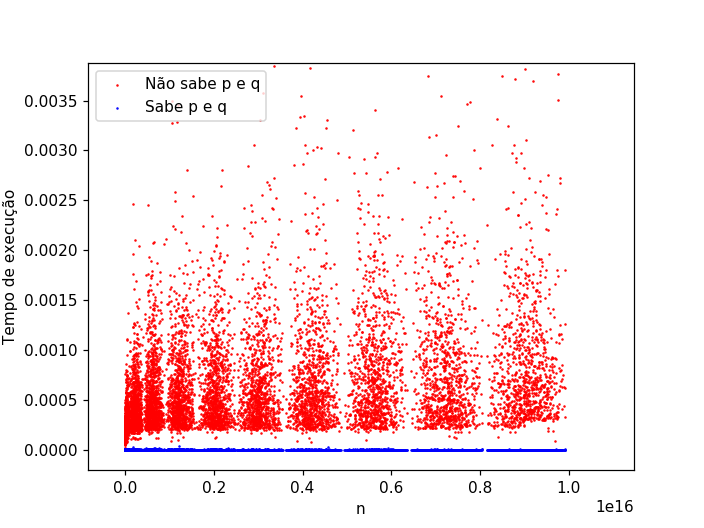

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd

df = pd.DataFrame.from_dict(data)

ax = plt.gca()

df.plot.scatter(x='n', y='time_without_using_primes', label='Não sabe p e q', c='red', ax=ax, s=0.4)
df.plot.scatter(x='n', y='time_using_primes', c='blue', label='Sabe p e q', ax=ax, s=0.4)

plt.ylabel('Tempo de execução')
plt.legend()


A moral da história é: quem não conhece $p$ e $q$, dificilmente saberá calcular $\phi(n)$, se $n$ for suficientemente grande.

#### Escolha aleatoriamente um $e$

$$
    e \in \left\{ 1 < x < \phi(n) : \gcd(x, \phi(n)) = 1 \right\}
$$

In [14]:
def choose_e(phi_n):
    e = randint(1, phi_n)
    while gcd(e, phi_n) != 1:
        e = randint(1, phi_n)
    return e

e = choose_e(phi_n)
print('Chave de encriptação e =', e)

Chave de encriptação e = 9475373


In [15]:
gcd(e, phi_n)

1

#### Compute a **chave de decriptação** $d$

Usando o *Algoritmo de Euclides Estendido*, temos que encontrar:

$$
    d \equiv e^{-1} \mod \phi(n).
$$ 


Dados $a$ e $b$, o algoritmo de Euclides estendido nos devolve o $\gcd(a, b)$ e inteiros $u$ e $v$ tais que

$$
    ua + vb = \gcd(a, b).
$$

In [16]:
gcd, u, v = xgcd(e, phi_n)
print('gcd =', gcd, ', u =', u, ', v =', v)

gcd = 1 , u = 11911397 , v = -3617577


Note que

$$
    ue + v\phi(n) = 1 \implies ue = 1 \mod \phi(n).
$$

Portanto, $d = u$ é a inversa de $e \mod \phi(n)$.


In [17]:
d = u
print('d =', d)

d = 11911397


In [18]:
e*d % phi_n

1

Calcular a inversa $\bmod $ é uma operação muito importante e já vem implementada no Sage: 

In [19]:
inverse_mod(e, phi_n)

11911397

### Encriptação

Seja $m$ um inteiro $0 < m < n$.  

In [20]:
m = randint(1, n)
print(m)

19774054


In [22]:
enc_m = power_mod(m, e, n)
print('enc_m = ', enc_m)

enc_m =  9133729


### Decriptação

In [23]:
dec_m = power_mod(enc_m, d, n)

In [24]:
dec_m

19774054

In [25]:
dec_m == m

True